# THỰC HÀNH

In [375]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy as sp
import scipy.stats as stats

from matplotlib.ticker import FixedLocator
from sklearn.preprocessing import LabelEncoder

In [316]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [317]:
df = pd.read_csv('house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [318]:
df = df.drop(['Id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Phân tích mô tả

### 1. Phân tích tương quan các đặc trưng với `SalePrice`

Phân tích sự tương quan của các biến đặc trưng (feature) với biến mục tiêu (target)

In [319]:
sns.set_style('whitegrid')

In [320]:
# Add a vertical line and text annotation to the plot
def add_info(ax, info_value, height, name, color='b'):
    ax.axvline(info_value, color=color, linestyle='--')
    ax.text(info_value, height, f'{name}: {info_value:.1f}', color=color)

In [321]:
# Create a histogram plot with additional statistical information
def common_distribution(title, data):
    _, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data, kde=True, ax=ax, color='skyblue')

    mode = stats.mode(data)
    mode_value = mode.mode if np.isscalar(mode.mode) else mode.mode[0]
    mode_count = mode.count if np.isscalar(mode.count) else mode.count[0]

    stats_info = {
        'Mode': ('g', mode_value, mode_count),
        'Min': ('gray', np.min(data), mode_count),
        'Max': ('gray', np.max(data), mode_count),
        'Median': ('b', np.median(data), mode_count),
        'Mean': ('r', np.mean(data), mode_count)
    }

    height = 8

    for name, (color, value, loc) in stats_info.items():
        add_info(ax, value, loc * height, name, color)
        height -= 0.5

    ax.set_title(f'Distribution of {title}', weight='bold',size=13, color='darkorange')
    ax.set_xlabel(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

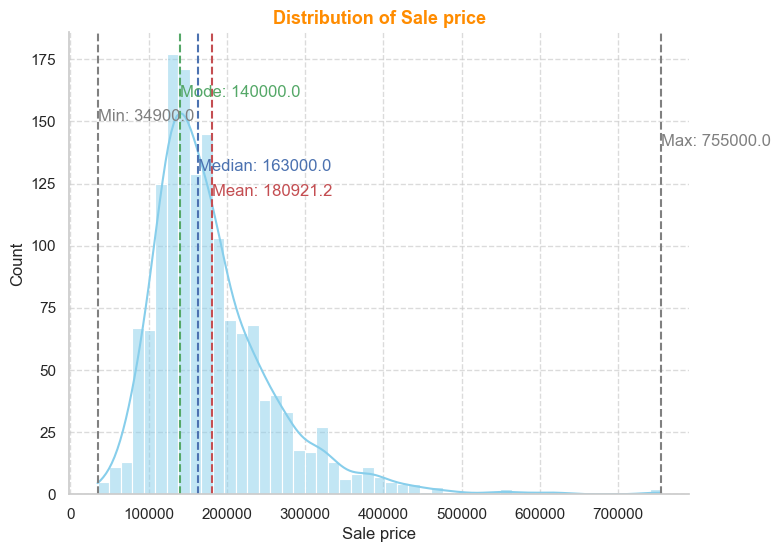

In [322]:
common_distribution('Sale price', df['SalePrice'])

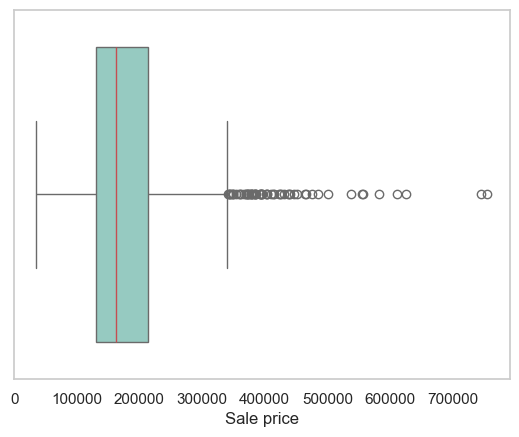

In [323]:
_, ax = plt.subplots()
sns.boxplot(x=df['SalePrice'], medianprops={'color': 'r'}, ax=ax, palette='Set3')

ax.set_xlabel('Sale price')

plt.grid(False)
plt.show()

In [324]:
Q1 = np.quantile(df['SalePrice'], 0.25)
Q3 = np.quantile(df['SalePrice'], 0.75)
IQR = Q3 - Q1
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

print(f'''Outlier low: {outlier_low}\tOutlier high: {outlier_high}
Min Sale price: {min(df['SalePrice'])}\tMax Sale price: {max(df['SalePrice'])}''')

Outlier low: 3937.5	Outlier high: 340037.5
Min Sale price: 34900	Max Sale price: 755000


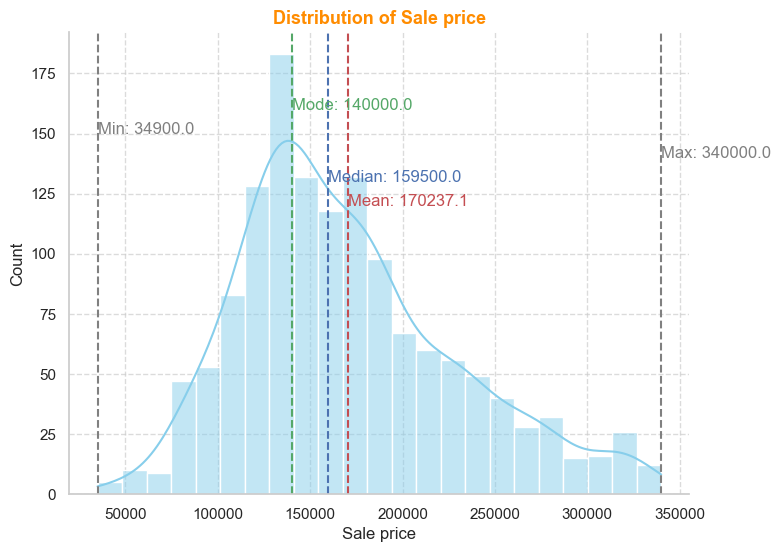

In [325]:
common_distribution('Sale price', df['SalePrice'][(df['SalePrice'] >= outlier_low) & (df['SalePrice'] <= outlier_high)])

### 2. Phân tích tương quan các đặc trưng với `SalePrice`

Phân tích sự tương quan của các biến đặc trưng (feature) với biến mục tiêu (target)

#### Đặc trưng có giá trị kiểu số (numeric variable)

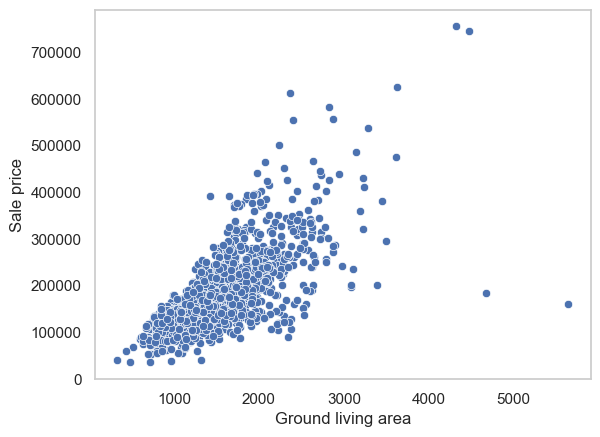

In [326]:
_, ax = plt.subplots()
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=ax)

ax.set_xlabel('Ground living area')
ax.set_ylabel('Sale price')

plt.grid(False)
plt.show()

In [327]:
df[df.GrLivArea > 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


#### Đặc trưng có giá trị kiệu loại (categorical feature)

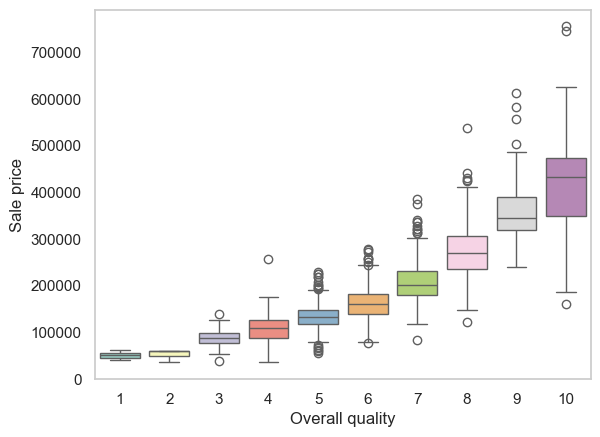

In [328]:
_, ax = plt.subplots()
sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Overall quality')
ax.set_ylabel('Sale price')

plt.grid(False)
plt.show()

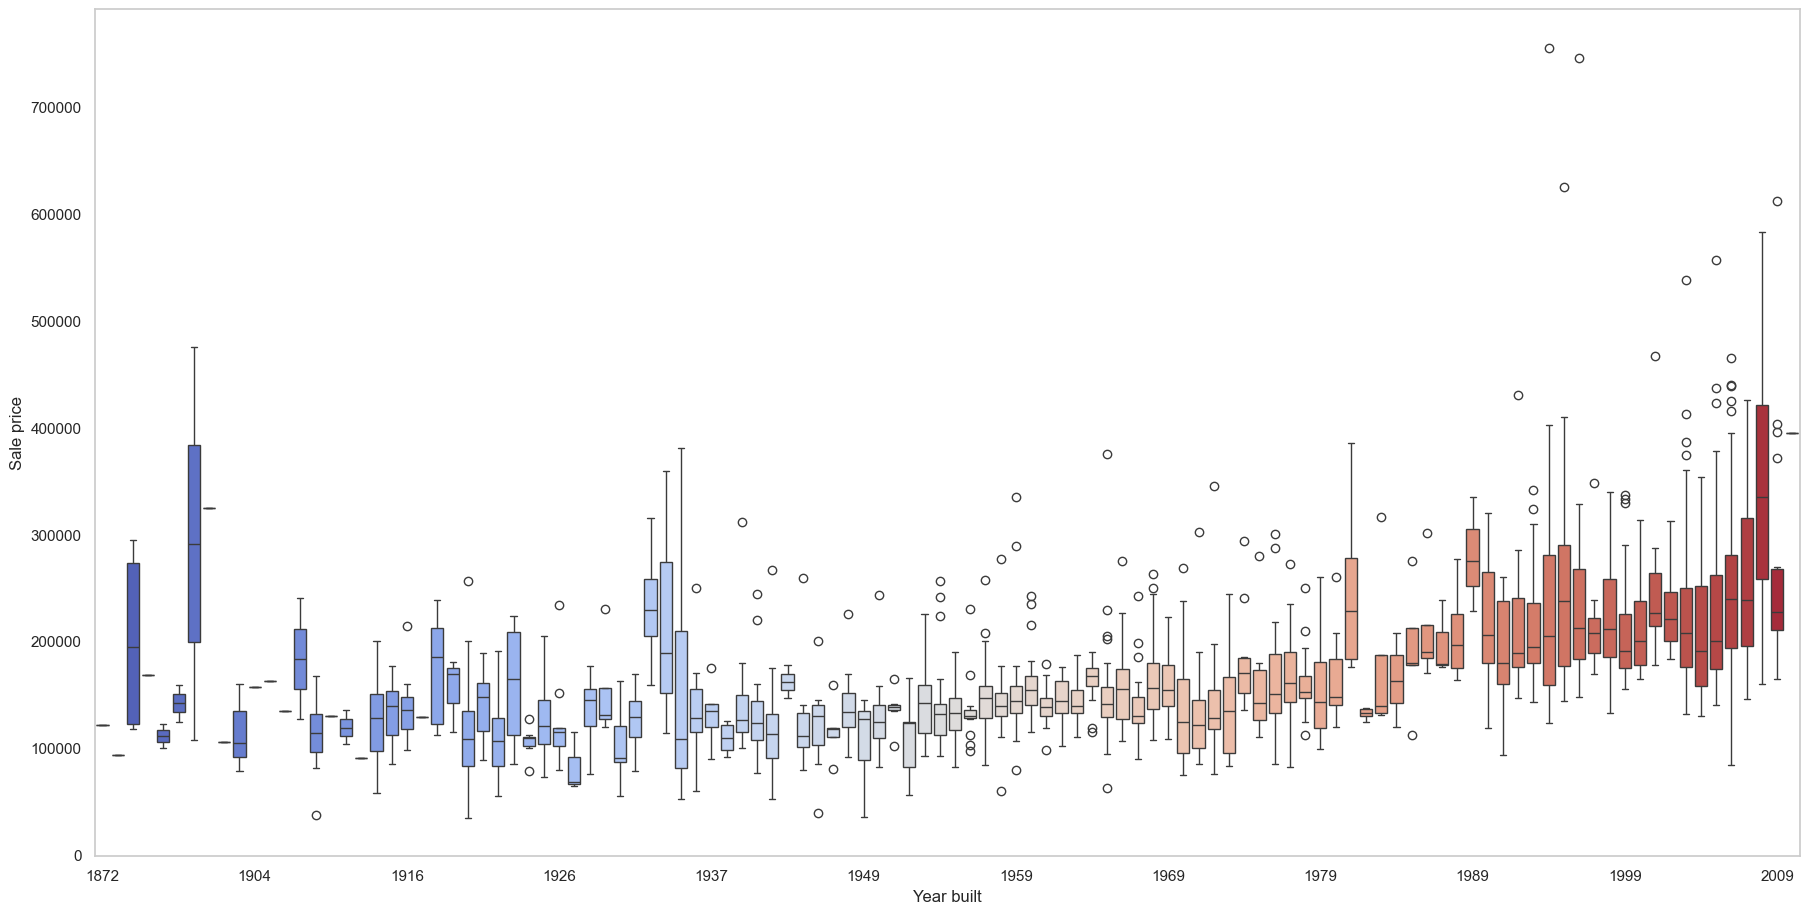

In [329]:
_, ax = plt.subplots(figsize=(22, 11))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df, ax=ax, palette='coolwarm')

ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.set_xticklabels([label.get_text() if i % 10 == 0 else '' for i, label in enumerate(ax.get_xticklabels())])
ax.set_xlabel('Year built')
ax.set_ylabel('Sale price')

plt.grid(False)
plt.show()

#### Heatmap

In [330]:
corr_mat = df.corr(numeric_only=True)

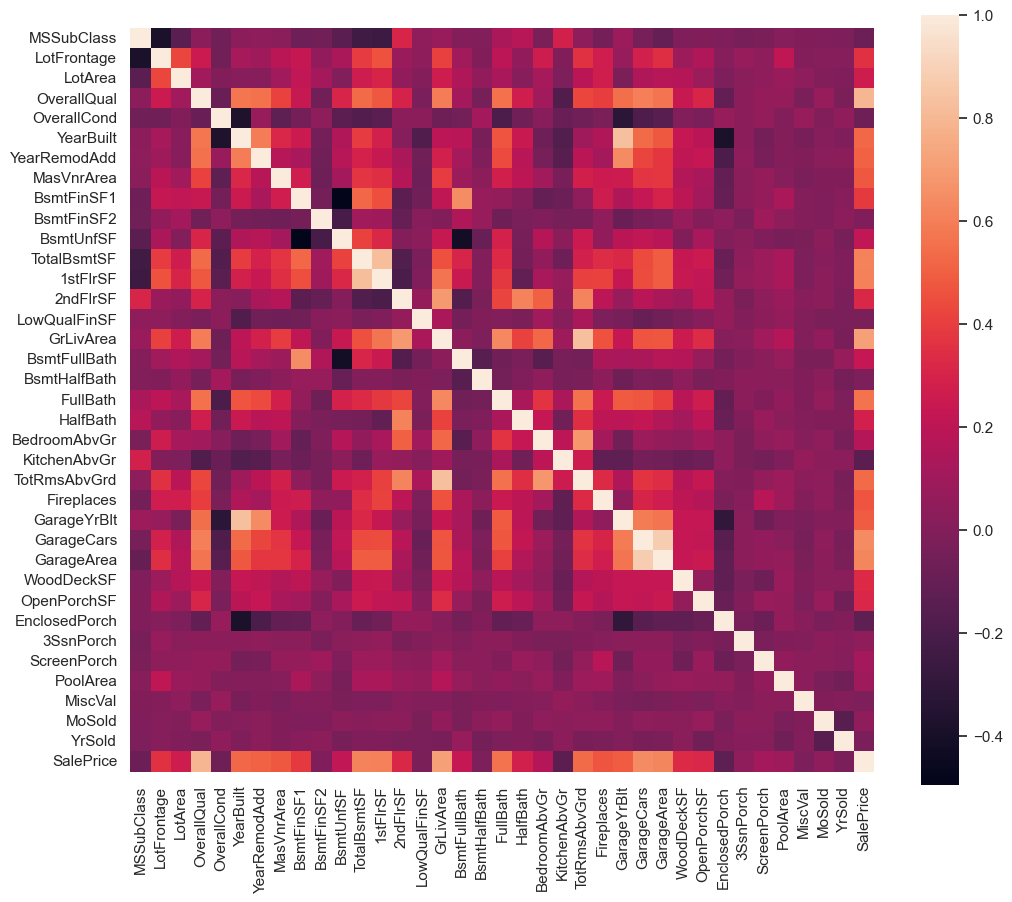

In [331]:
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_mat, square=True, ax=ax)

plt.show()

> Dùng kiến thức chuyên ngành để kiểm tra xe nó có thực sự tương quan với nhau không?</br>
Biến đầu vào: các thuộc tính có tương quan lớn có thể dùng kiến thức chuyên ngành hoặc đi sâu vào phân tích để loại bỏ bớt thuộc tính để giảm chi phí tính toán khi xây dựng mô hình và tránh trường hợp overfit.

**Zoom biểu đồ heatmap**

> Có khá nhiều biến đầu vào...</br>
Yêu cầu chỉ dùng 10 biến đầu vào có tương quan thuận để dự đoán biến mục tiêu, hoặc zoom lên để xem 10 biến đầu vào có correlation cao nhất với biến mục tiêu để quan sát.

In [332]:
K = 10

In [333]:
n_largs = corr_mat.nlargest(K, 'SalePrice')
n_largs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


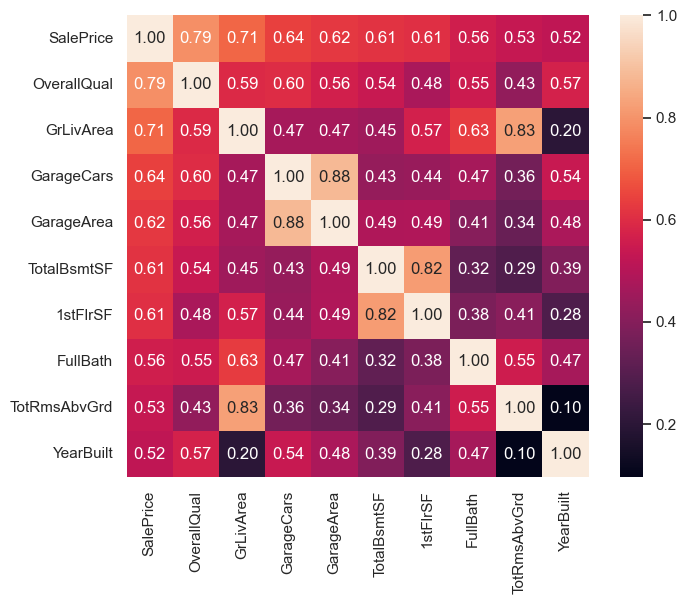

In [334]:
_, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[n_largs['SalePrice'].index].corr(), square=True, ax=ax, annot=True, fmt='.2f')

plt.show()

#### Pairplot

> Đối với thuộc tính kiểu loại muốn xem correlation với thuộc tính kiểu số nên dùng boxplot, còn ở đây mình chỉ quan tâm đến xu hướng và check sự tương quan có thể dùng scatter plot là đủ như sale price và overall quality.

In [335]:
sns.set()

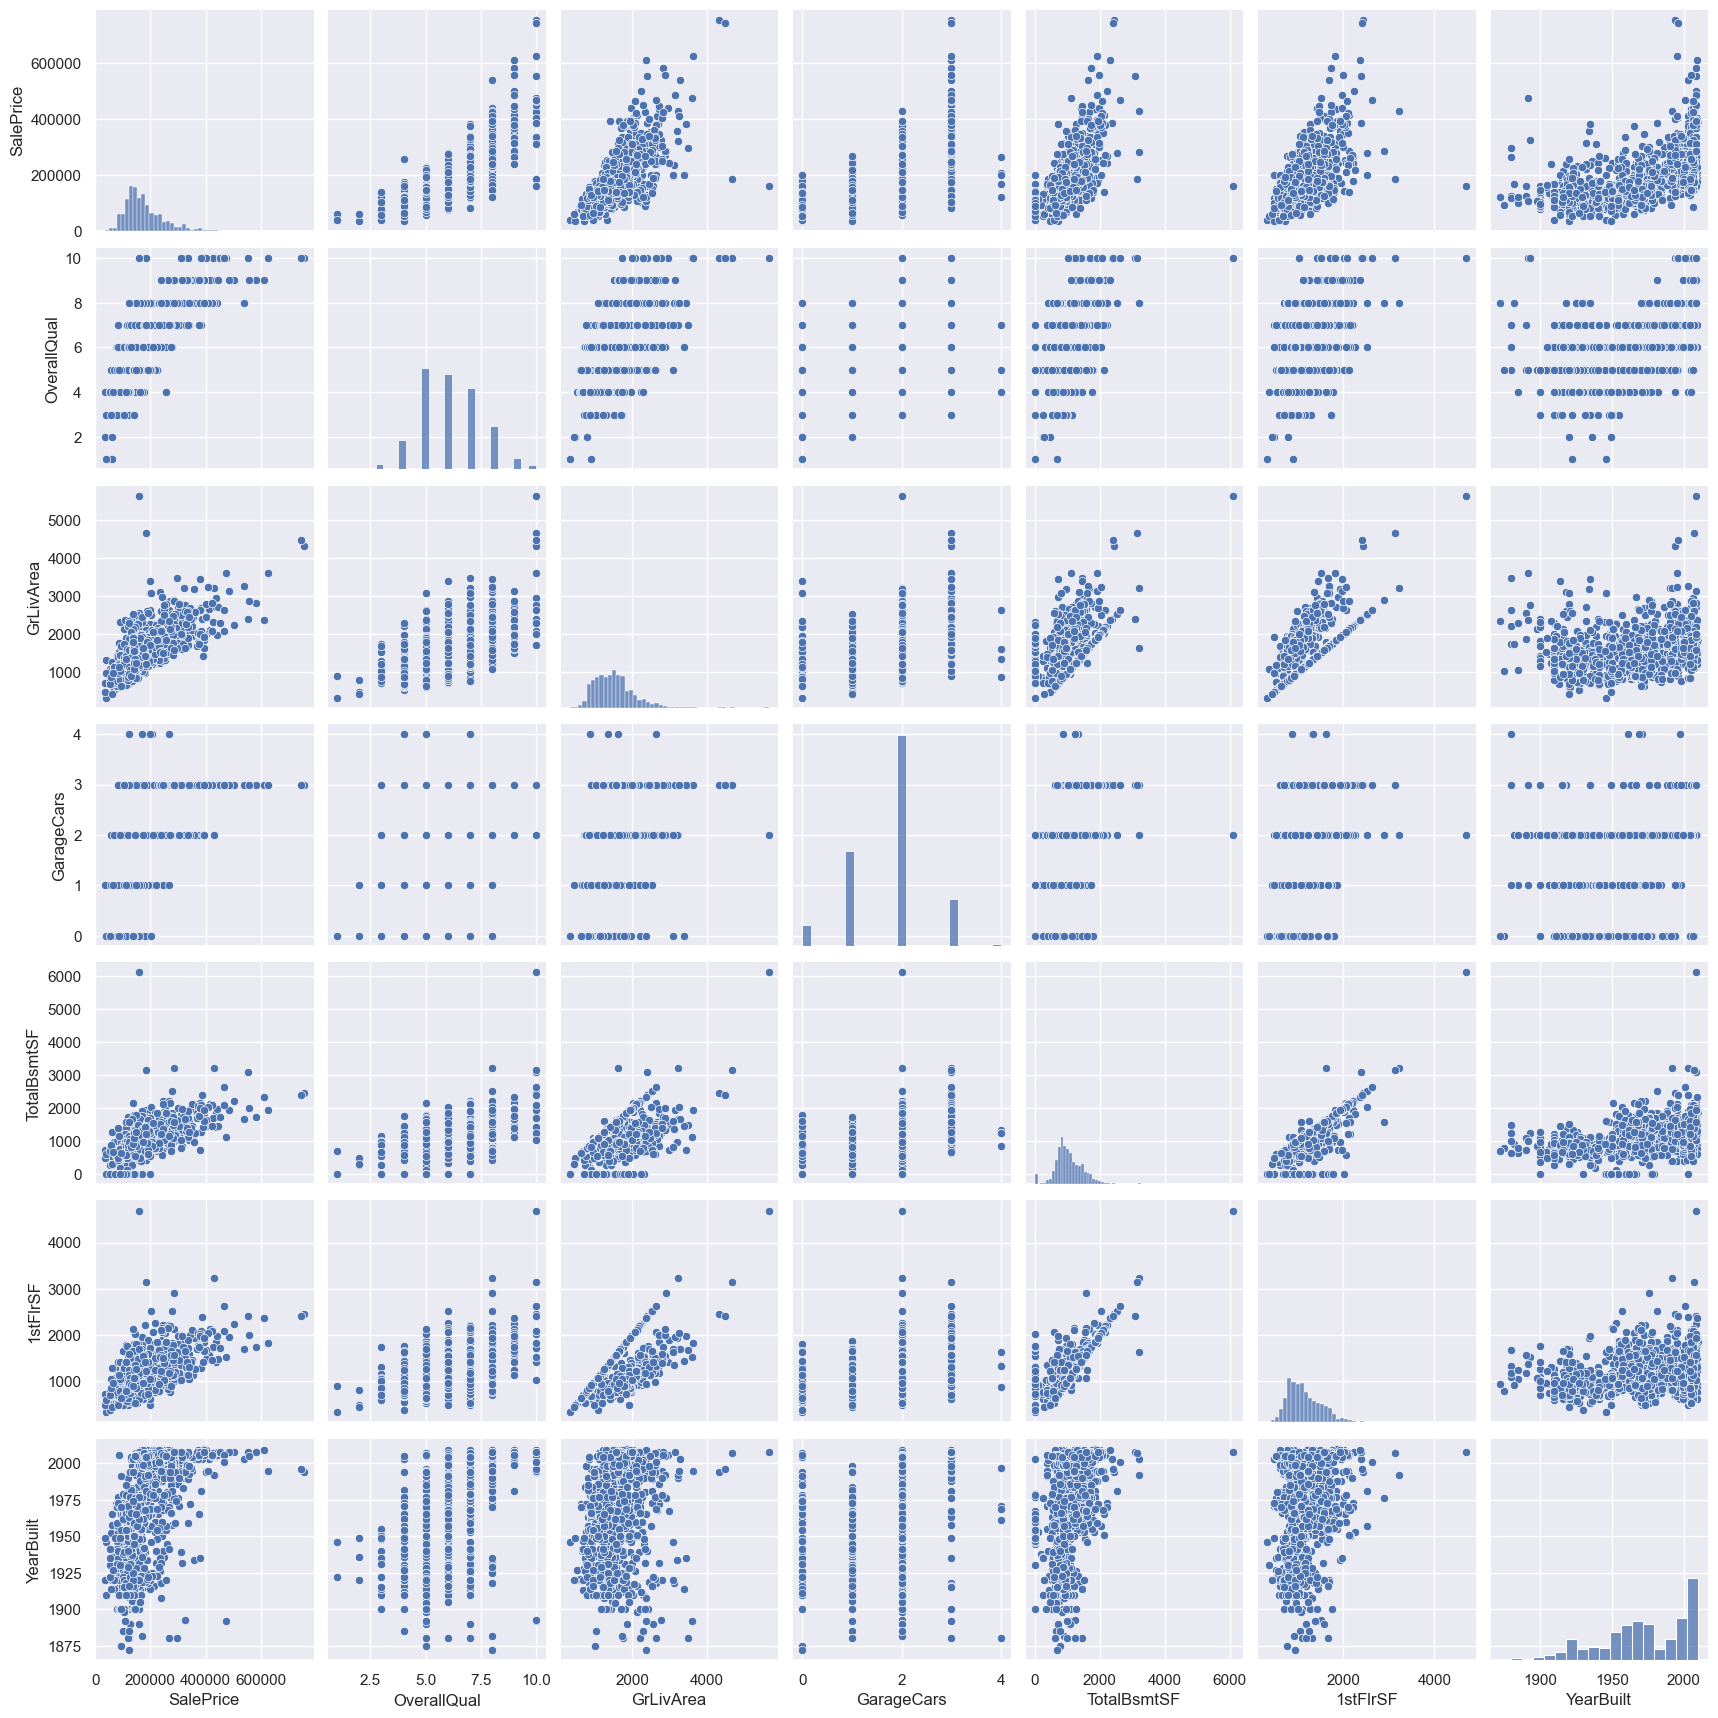

In [336]:
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']])

plt.show()

### Xử lý dữ liệu thiếu

In [337]:
miss = df.isna().sum()
miss = miss[miss > 0]

print(f'''Danh sách các cột thiếu dữ liệu:
{miss}

Số lượng cột có dữ liệu thiếu: {len(miss)}''')

Danh sách các cột thiếu dữ liệu:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Số lượng cột có dữ liệu thiếu: 19


> Các cột như PoolQC, Fence, Alley,... dữ liệu khuyết khá nhìu, hầu như không có, mình có thể bỏ qua (drop các cột này).</br>
Trong thực tế có thể khó thu thập hoặc không ảnh hưởng nhiều đến biến mục tiêu.

#### Nhóm N/A

In [338]:
bsmt_list = [i for i in miss.index if i.startswith('Bsmt') or i.startswith('Garage')]
bsmt_list.remove('GarageYrBlt')
bsmt_list.extend(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

print(bsmt_list)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [339]:
for bsmt_type in bsmt_list:
    if df[bsmt_type].dtype == 'object':
        df[bsmt_type].mask(df[bsmt_type].isna(), 'NA', inplace=True)
        print(f'{bsmt_type} (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.')
    else:
        df[bsmt_type].mask(df[bsmt_type].isna(), 0, inplace=True)
        print(f'{bsmt_type} (kiểu số): đã điền giá trị 0 cho dữ liệu thiếu.')

BsmtQual (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtCond (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtExposure (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtFinType1 (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtFinType2 (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageType (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageFinish (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageQual (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageCond (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
Alley (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
FireplaceQu (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
PoolQC (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
Fence (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
MiscFeature (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.


#### Nhóm còn lại

In [340]:
miss = df.isna().sum()
miss = miss[miss > 0]

print(f'''Danh sách các cột thiếu dữ liệu:
{miss}

Số lượng cột có dữ liệu thiếu: {len(miss)}''')

Danh sách các cột thiếu dữ liệu:
LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

Số lượng cột có dữ liệu thiếu: 5


In [341]:
sns.set_style('whitegrid')

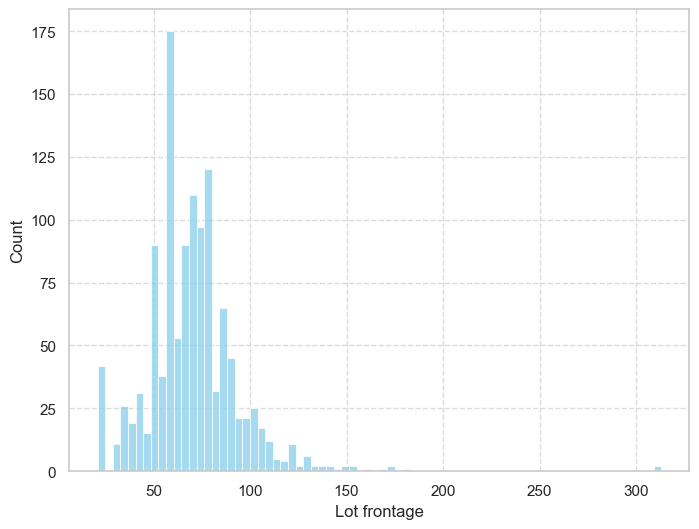

In [342]:
_, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['LotFrontage'], ax=ax, color='skyblue')

ax.set_xlabel('Lot frontage')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

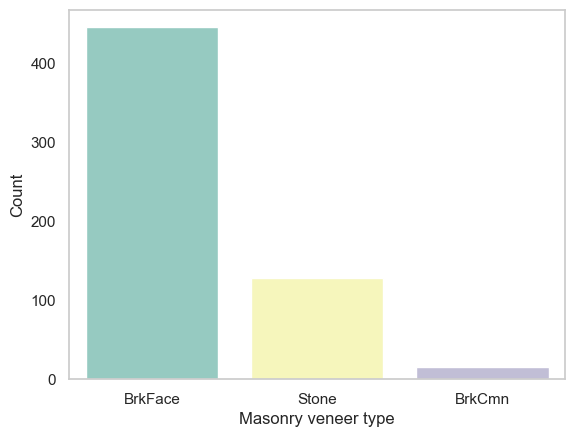

In [343]:
_, ax = plt.subplots()
sns.countplot(x='MasVnrType', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Masonry veneer type')
ax.set_ylabel('Count')

plt.grid(False)
plt.show()

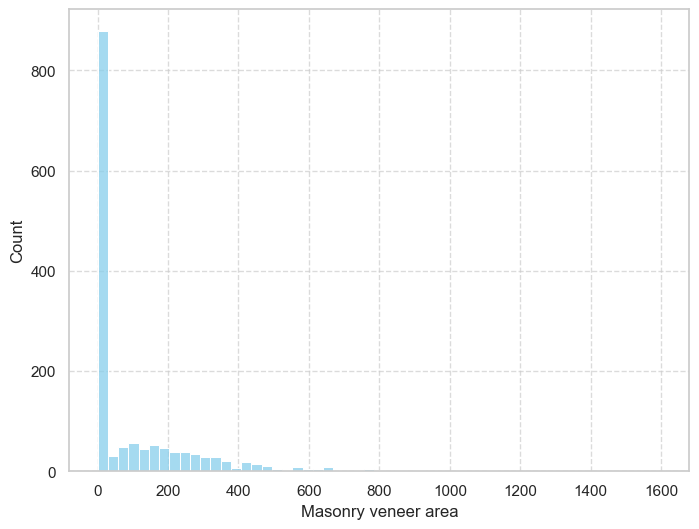

In [344]:
_, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['MasVnrArea'], ax=ax, color='skyblue')

ax.set_xlabel('Masonry veneer area')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

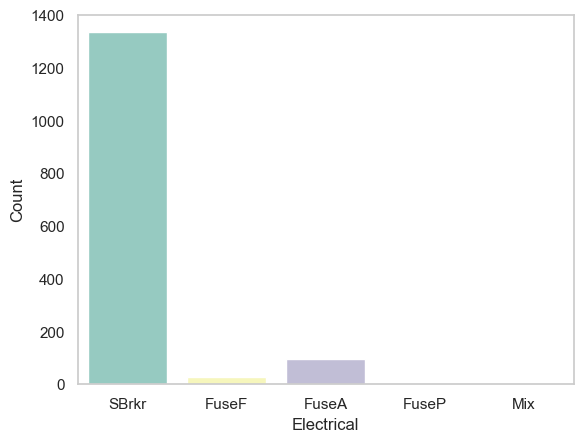

In [345]:
_, ax = plt.subplots()
sns.countplot(x='Electrical', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Electrical')
ax.set_ylabel('Count')

plt.grid(False)
plt.show()

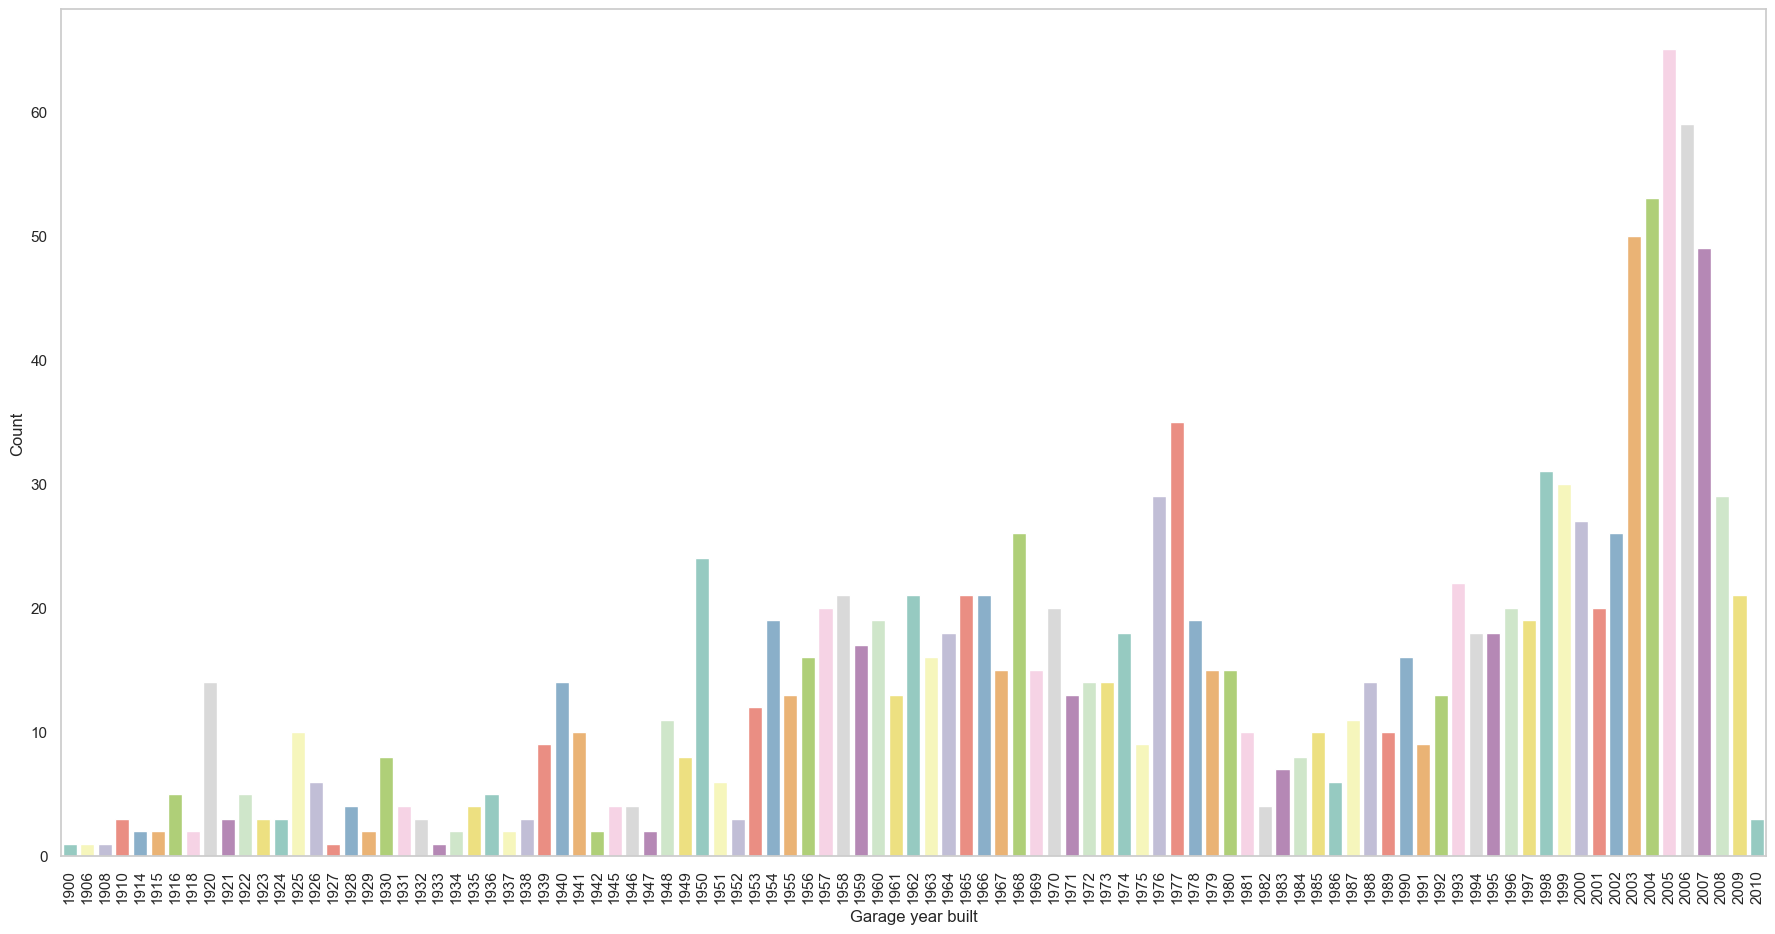

In [346]:
_, ax = plt.subplots(figsize=(22, 11))
sns.countplot(x='GarageYrBlt', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Garage year built')
ax.set_ylabel('Count')
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
xticklabels = [str(int(float(label.get_text()))) if not np.isnan(float(label.get_text())) else '' for label in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, rotation=90)

plt.grid(False)
plt.show()

In [347]:
for col in miss.index:
    if df[col].dtype == 'object' or col == 'GarageYrBlt':
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f'{col} (kiểu loại): đã điền giá trị mode "{mode_value}" cho dữ liệu thiếu.')
    else:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f'{col} (kiểu số): đã điền giá trị trung vị {median_value} cho dữ liệu thiếu.')

LotFrontage (kiểu số): đã điền giá trị trung vị 69.0 cho dữ liệu thiếu.
MasVnrType (kiểu loại): đã điền giá trị mode "BrkFace" cho dữ liệu thiếu.
MasVnrArea (kiểu số): đã điền giá trị trung vị 0.0 cho dữ liệu thiếu.
Electrical (kiểu loại): đã điền giá trị mode "SBrkr" cho dữ liệu thiếu.
GarageYrBlt (kiểu loại): đã điền giá trị mode "2005.0" cho dữ liệu thiếu.


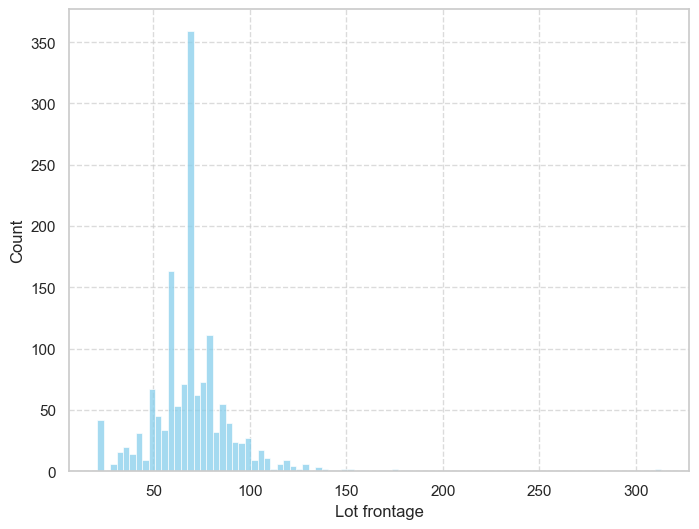

In [348]:
_, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['LotFrontage'], ax=ax, color='skyblue')

ax.set_xlabel('Lot frontage')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

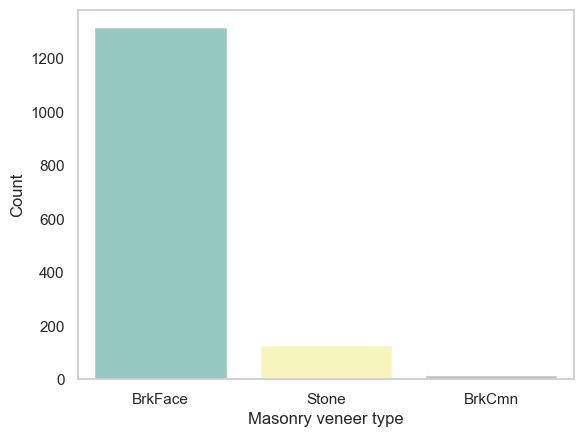

In [349]:
_, ax = plt.subplots()
sns.countplot(x='MasVnrType', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Masonry veneer type')
ax.set_ylabel('Count')

plt.grid(False)
plt.show()

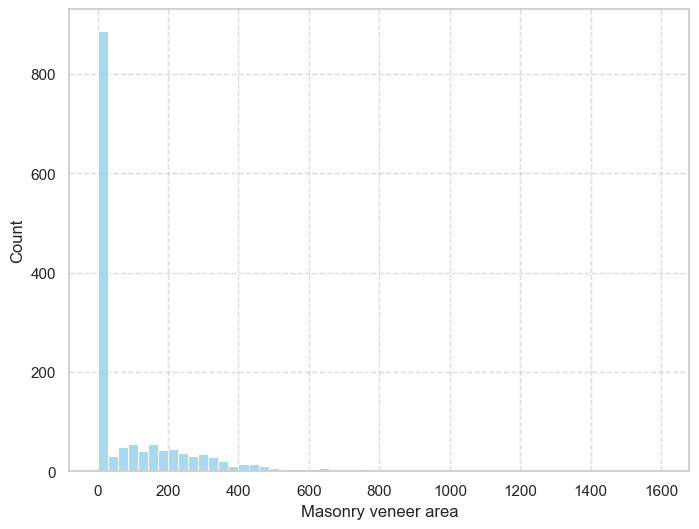

In [350]:
_, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['MasVnrArea'], ax=ax, color='skyblue')

ax.set_xlabel('Masonry veneer area')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

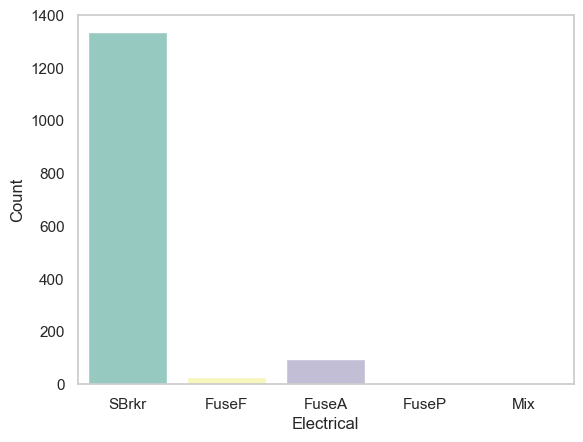

In [351]:
_, ax = plt.subplots()
sns.countplot(x='Electrical', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Electrical')
ax.set_ylabel('Count')

plt.grid(False)
plt.show()

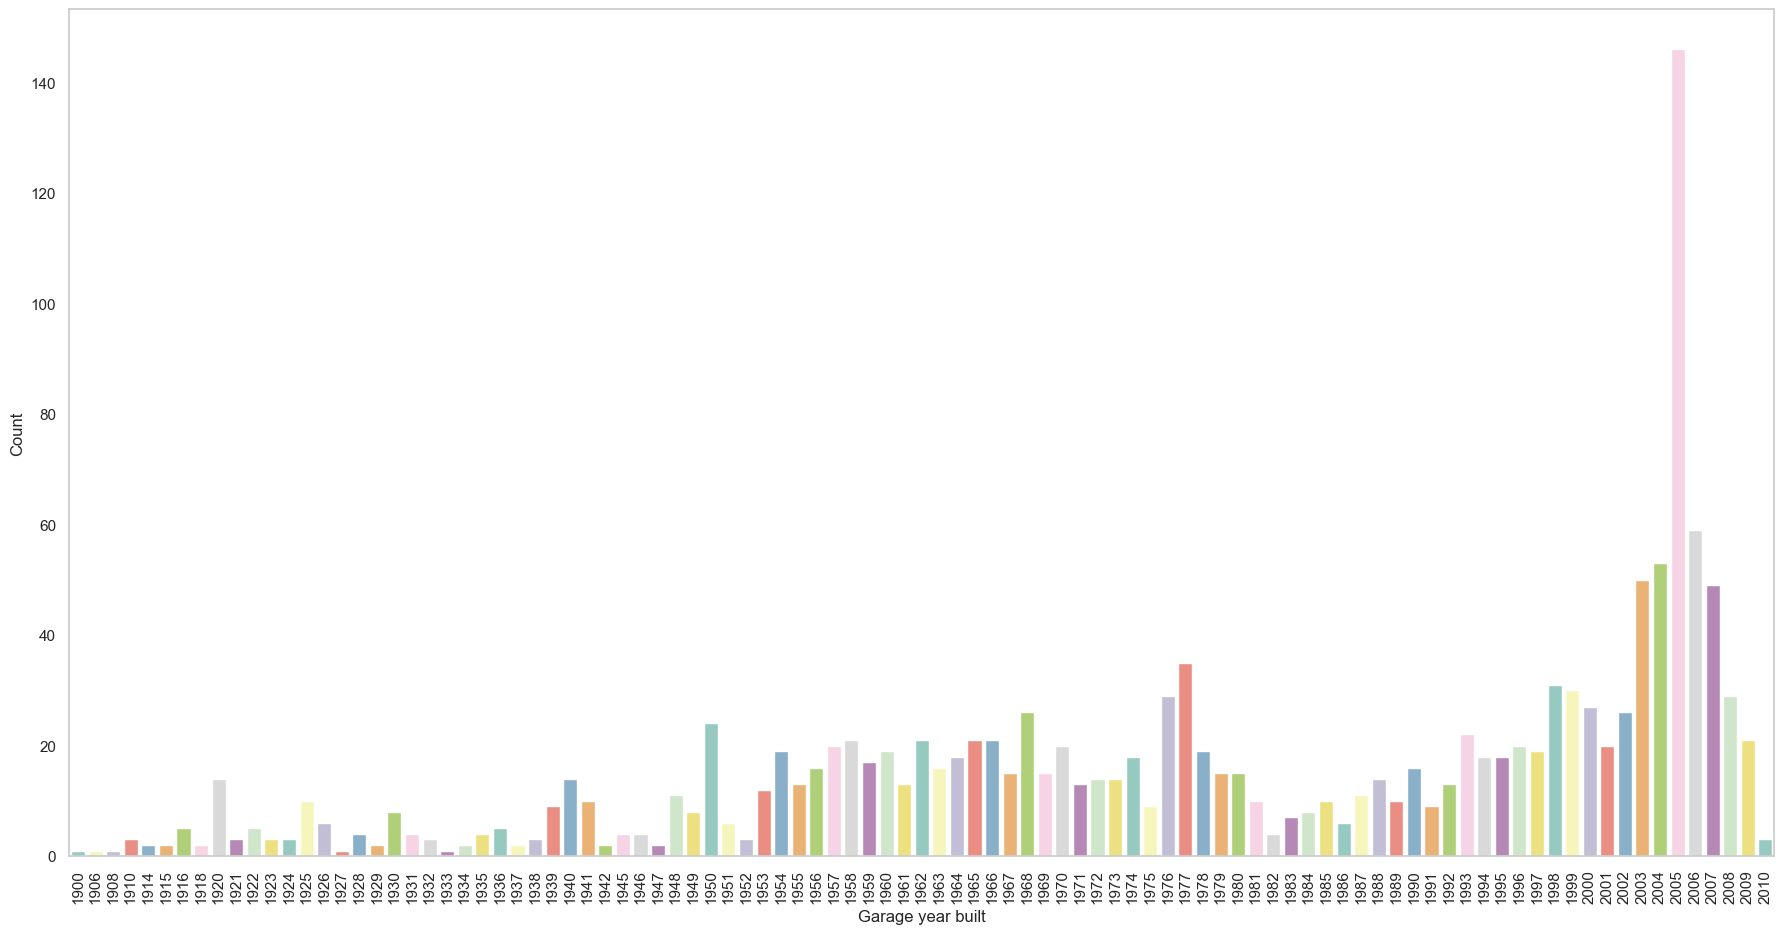

In [352]:
_, ax = plt.subplots(figsize=(22, 11))
sns.countplot(x='GarageYrBlt', data=df, ax=ax, palette='Set3')

ax.set_xlabel('Garage year built')
ax.set_ylabel('Count')
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
xticklabels = [str(int(float(label.get_text()))) for label in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, rotation=90)

plt.grid(False)
plt.show()

**Kiểm tra lại**

In [353]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

### Tiền xử lý và chuẩn hóa dữ liệu

> Khi cực trị nhiều hơn ở 1 phía:</br>- Nếu các cực trị nhỏ hơn giá trị trung bình, lệch âm.</br>- Nếu các cực trị lớn hơn giá trị trung bình, lệch dương.</br>
Độ lệch cho chúng ta biết mức độ tin cậy của phương sai là như thế nào.</br></br>
Phân phối chuẩn có kurtosis bằng 3, và skewness bằng 0.

#### SalePrice

C:\Users\yamia\AppData\Local\Temp\ipykernel_19568\1146468563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], ax=ax, kde=True, fit=stats.norm, color='skyblue')


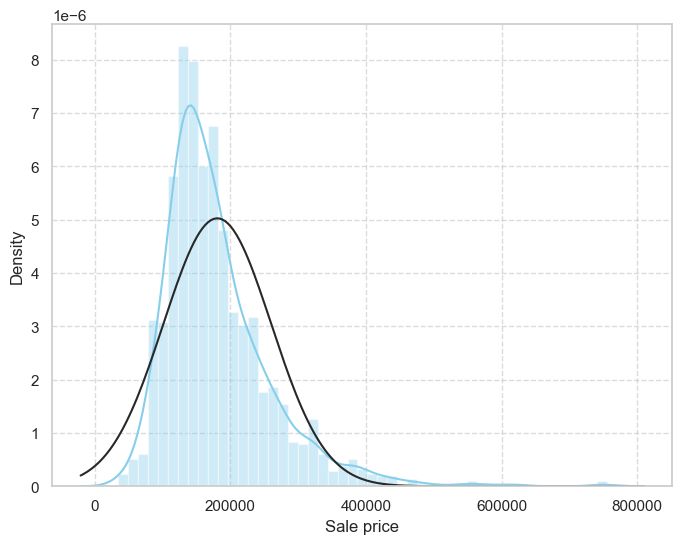

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [354]:
_, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['SalePrice'], ax=ax, kde=True, fit=stats.norm, color='skyblue')

ax.set_xlabel('Sale price')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

print(f'''Skewness: {df['SalePrice'].skew()}
Kurtosis: {df['SalePrice'].kurtosis()}''')

> Biểu đồ phần phân bố SalePrice cho thấy, phân bố lệch về bên phải. Tuy nhiên, linear regession (cũng như các model tuyến tính) làm việc tốt hơn trên phân bố chuẩn. Vậy cần biến đổi (transform) SalePrice về phân phối chuẩn.

In [355]:
df["SalePrice"] = np.log1p(df["SalePrice"])

mu = 12.02
sigma = 0.40


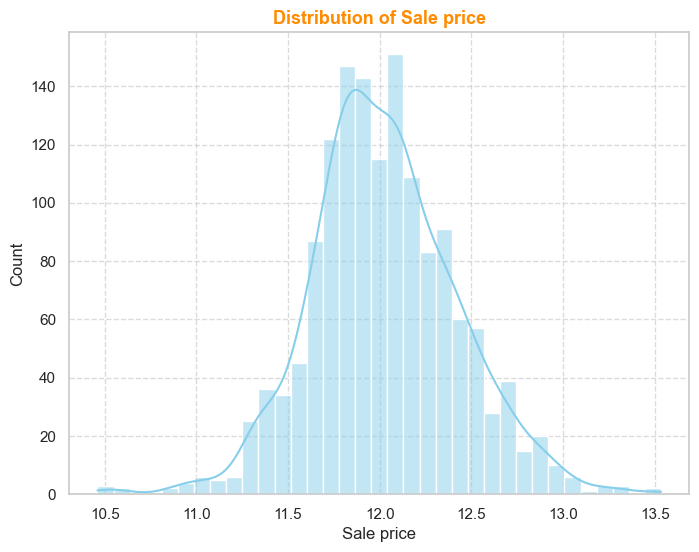

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


In [356]:
_, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['SalePrice'], ax=ax, kde=True, color='skyblue')

(mu, sigma) = stats.norm.fit(df['SalePrice'])
print('''mu = {:.2f}
sigma = {:.2f}'''.format(mu, sigma))

ax.set_title('Distribution of Sale price', weight='bold',size=13, color='darkorange')
ax.set_xlabel('Sale price')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

print(f'''Skewness: {df['SalePrice'].skew()}
Kurtosis: {df['SalePrice'].kurtosis()}''')

##### Skewness các cột còn lại
-- TODO

In [357]:
skewness = pd.DataFrame.from_dict({col: df[col].dropna().skew() for col in df.dtypes[df.dtypes != "object"].index}, orient='index', columns=['Skew'])
skewness = skewness.sort_values('Skew', axis=0, ascending=False)
skewness.head(5)

,Skew
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341


In [358]:
LAM = 0.15

In [359]:
skewness = skewness[abs(skewness) > LAM]
print(f'There are {skewness.shape[0]} skewed numerical features to Box Cox transform')

There are 37 skewed numerical features to Box Cox transform


C:\Users\yamia\AppData\Local\Temp\ipykernel_19568\4051113497.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_LotArea, ax=ax, kde=True, fit=stats.norm, color='skyblue')


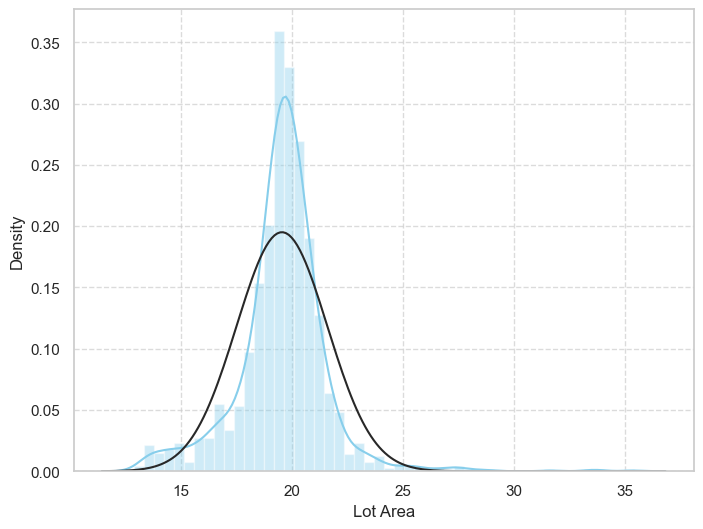

0.7527214083292086 8.047120997211637


In [360]:
norm_LotArea = sp.special.boxcox1p(df['LotArea'], LAM)

_, ax = plt.subplots(figsize=(8, 6))
sns.distplot(norm_LotArea, ax=ax, kde=True, fit=stats.norm, color='skyblue')

ax.set_xlabel('Lot Area')

plt.grid(linestyle='--', alpha=0.7)
plt.show()

print(norm_LotArea.skew(), norm_LotArea.kurtosis())

In [361]:
np.unique(df['PoolArea'], return_counts=True)

(array([  0, 480, 512, 519, 555, 576, 648, 738], dtype=int64),
 array([1453,    1,    1,    1,    1,    1,    1,    1], dtype=int64))

In [362]:
norm_poolArea = sp.stats.boxcox(df['PoolArea'], LAM)

In [363]:
np.unique(norm_poolArea, return_counts=True)

(array([-6.66666667, 10.16375228, 10.32747503, 10.36212548, 10.53429343,
        10.63038623, 10.93869665, 11.28551338]),
 array([1453,    1,    1,    1,    1,    1,    1,    1], dtype=int64))

In [ ]:
'''
- Lưu ý: log transform sẽ không hoạt động khi có giá trị âm hoặc nhiều giá trị 0 trong danh sách giá trị,
 nên cần phải xử lý các giá trị này trước khi thực hiện chuyển hóa.
 '''

'\n- Lưu ý: log transform sẽ không hoạt động khi có giá trị âm hoặc nhiều giá trị 0 trong danh sách giá trị,\n nên cần phải xử lý các giá trị này trước khi thực hiện chuyển hóa.\n '

### LabelEncoder và OneHotEncoding

- LabelEncoder: tiết kiệm bộ nhớ khi tính toán, ranking ảnh hưởng đến mô hình hóa dữ liệu.
- OneHotEncoding: Tốn bộ nhớ cao khi tính toán, không ranking theo alphabet.

#### Label Encoding

In [366]:
for col in df.dtypes[df.dtypes == "object"].index:
    lbl = LabelEncoder() 
    lbl.fit(list(df[col].values)) 
    df[col] = lbl.transform(list(df[col].values))

print(f'Shape all_data: {df.shape}')

Shape all_data: (1460, 80)


In [367]:
df_temp = pd.read_csv('house_price.csv')
lbl = LabelEncoder() 
lbl.fit(list(df_temp['FireplaceQu'].values)) 

print(lbl.transform(list(df_temp['FireplaceQu'].values)))

[5 4 4 ... 2 5 5]


In [368]:
df_temp['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

#### One Hot Encoding

In [371]:
df_temp = pd.read_csv('house_price.csv')
df_temp.drop(['Id'], axis=1)
np.shape(df_temp)

(1460, 81)

In [373]:
hprice_df_temp = pd.get_dummies(df_temp)
hprice_df_temp.shape

(1460, 289)

In [383]:
hprice_df_temp[[col for col in hprice_df_temp.columns if col.startswith('MSZoning_')]]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
1455,False,False,False,True,False
1456,False,False,False,True,False
1457,False,False,False,True,False
1458,False,False,False,True,False


# BÀI TẬP

## Đề Bài

1. Áp dụng lý thuyết CLT để tính giá trị trung bình của `SalePrice` (tập dữ liệu giá nhà) chỉ sử dụng 400 mẫu. Tính độ lệch chuẩn và vẽ biểu đồ histogram cho dữ liệu mean dựa và CLT.
2. Phân tích mối quan hệ giữa SalePrice và các thuộc tính kiểu loại (categorical data) và rút ra nhận xét. Ít nhất 3 thuộc tính.
2. Phân tích mối quan hệ giữa SalePrice và các thuộc tính kiểu số (numerical data) và rút ra nhận xét. Ít nhất 3 thuộc tính.
3. Chọn kỹ thuật phù hợp (LabelEncoder và OnehotEncoding) để biến đổi các thuộc tính kiểu loại.
4. Xử lý các dữ liệu nhiễu trong dữ liệu và tính lại hệ số tương quan so với SalePrice.

## Bài Làm

### Bài 1

In [385]:
data = pd.read_csv('house_price.csv')

In [386]:
N = 1000
N_SAMPLES = 400

In [388]:
sample_means = []

for _ in range(N):
    sample_means.append(np.mean(np.random.choice(data['SalePrice'], N_SAMPLES)))
    
sample_mean = np.mean(sample_means)
sample_std = np.std(sample_means)

sample_mean, sample_std

(181196.4597325, 4018.7298754796348)

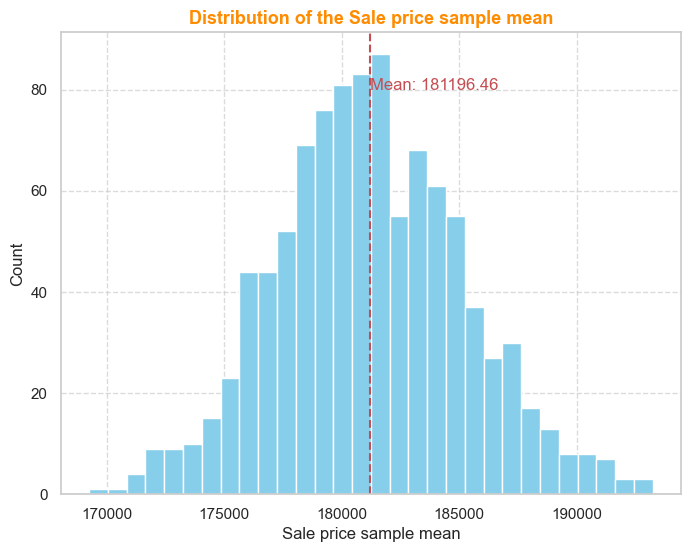

In [419]:
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=30, color='skyblue')
plt.axvline(sample_mean, color='r', linestyle='--')
plt.text(sample_mean, 80, f'Mean: {sample_mean:.2f}', color='r')
plt.title('Distribution of the Sale price sample mean', weight='bold',size=13, color='darkorange')
plt.xlabel('Sale price sample mean')
plt.ylabel('Count')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### Bài 2

In [422]:
CATEGORICAL_SAMPLES = ['MSZoning', 'Street', 'LotShape']

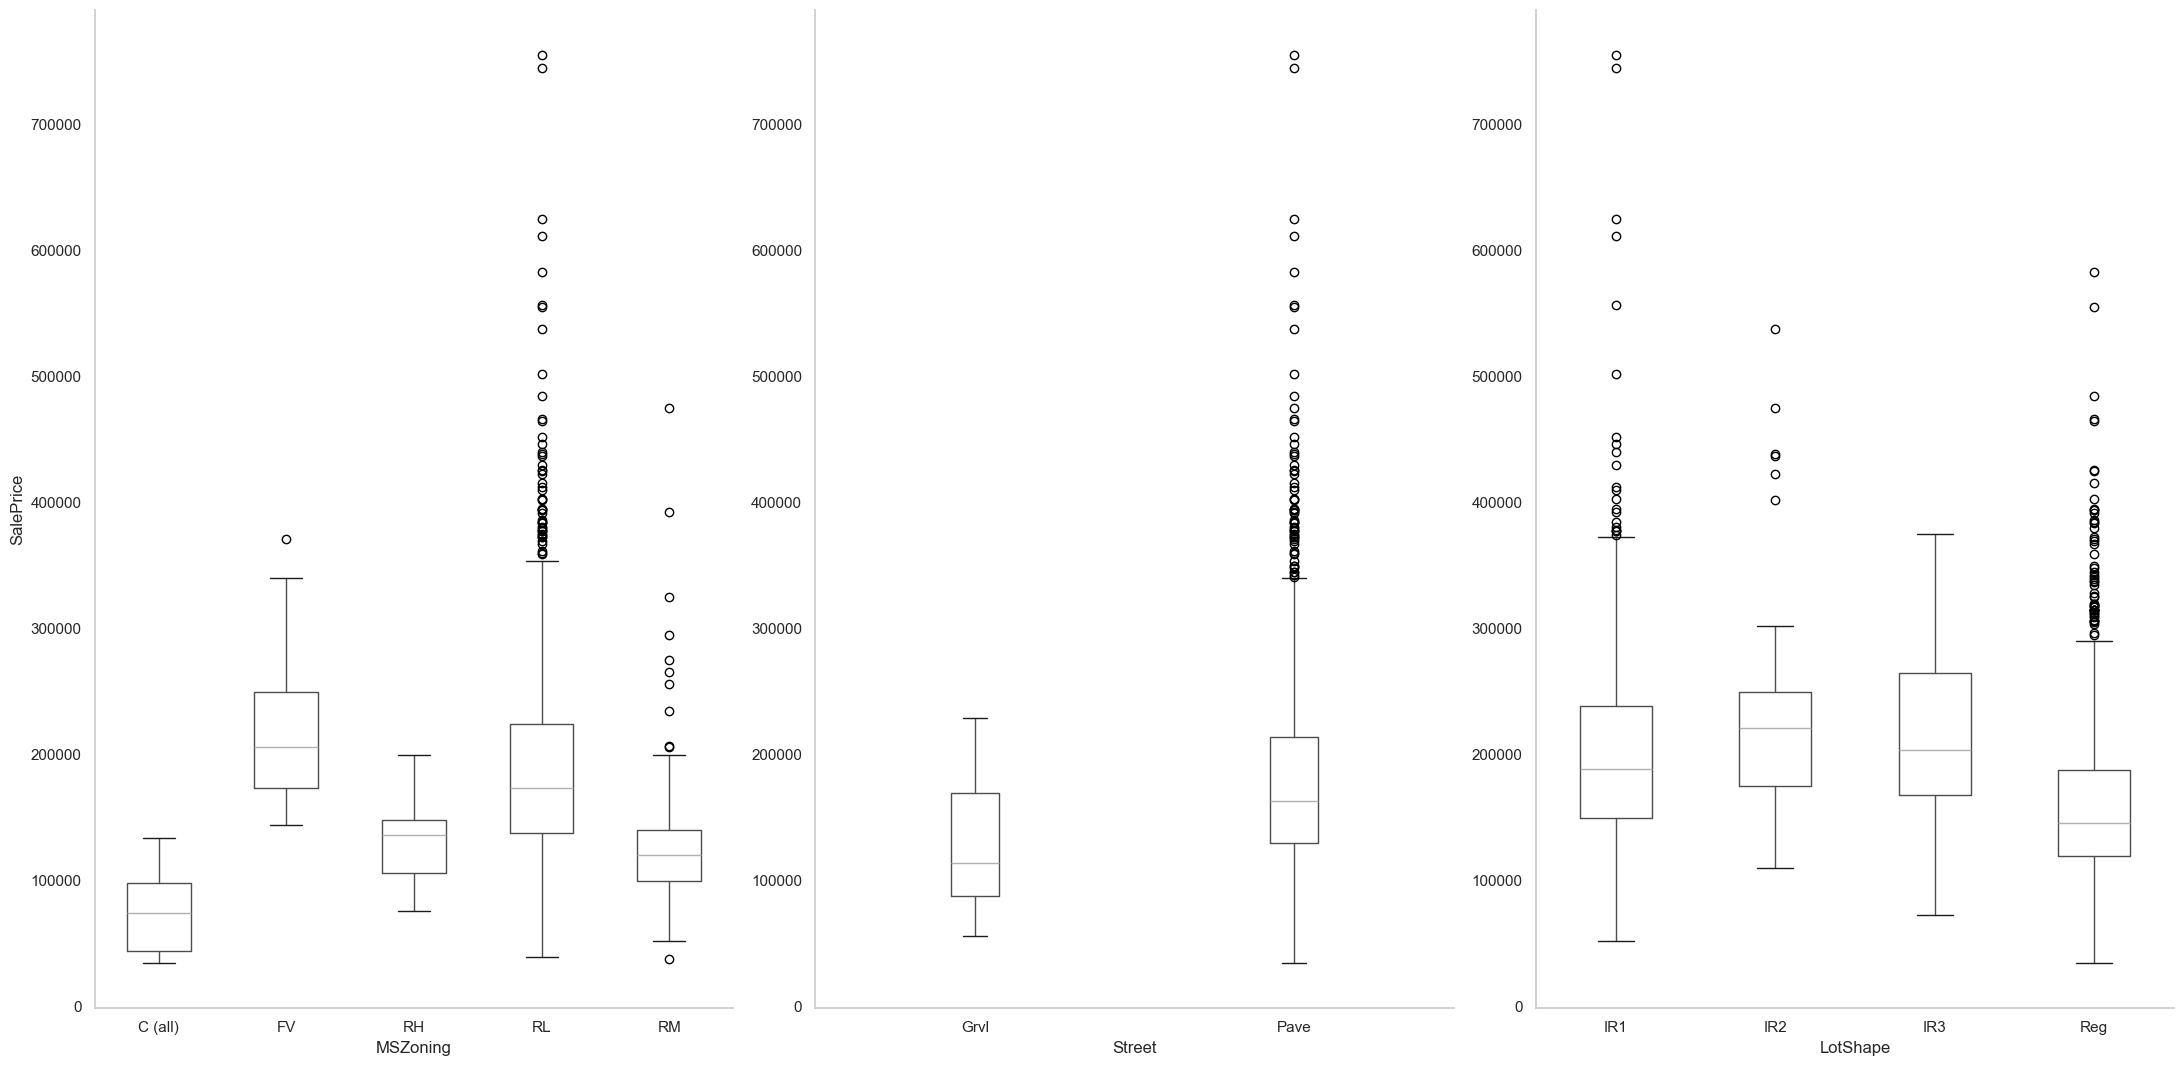

In [451]:
plt.figure(figsize=(22, 11))

axes = [plt.subplot(1, 3, i, sharey=axes[0] if i > 1 else None) for i in range(1, 4)]

for ax, feature in zip(axes, CATEGORICAL_SAMPLES):
    data.boxplot(column='SalePrice', by=feature, ax=ax)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title('')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice' if ax is axes[0] else '')
    ax.grid(False)
    
plt.suptitle('')
plt.tight_layout()
plt.show()

### Bài 3

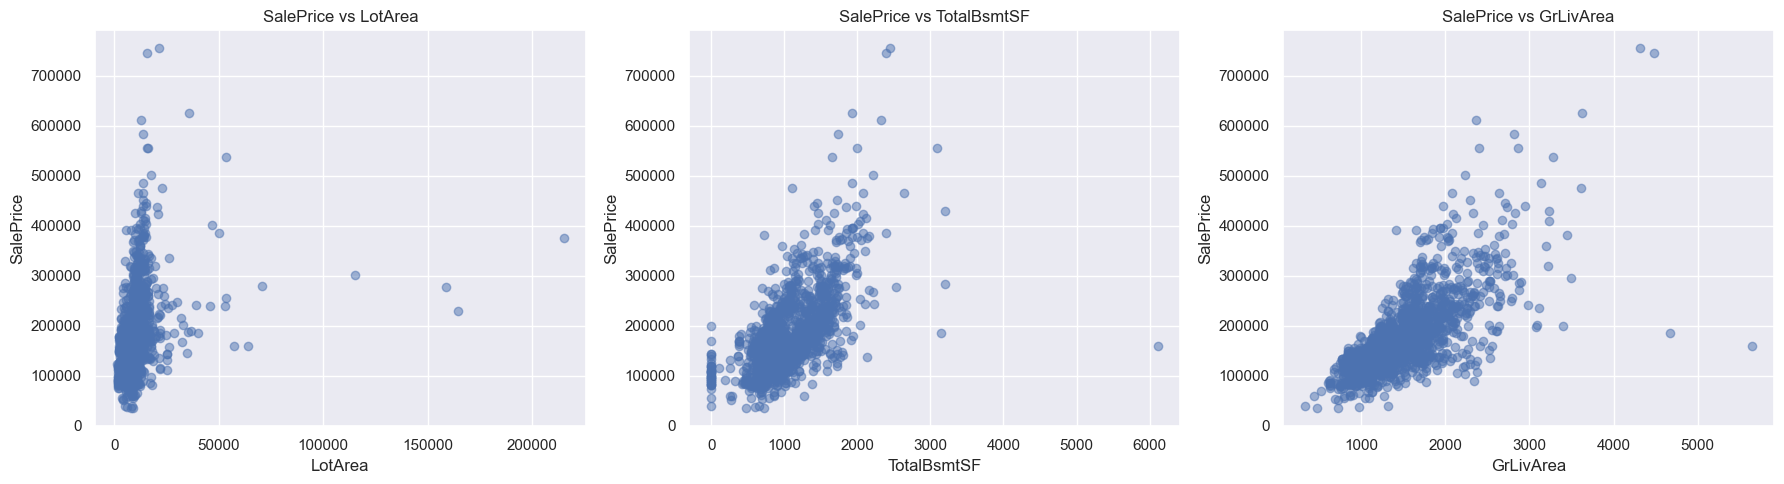

SalePrice      1.000000
GrLivArea      0.708624
TotalBsmtSF    0.613581
LotArea        0.263843
Name: SalePrice, dtype: float64

In [ ]:
# Định nghĩa và vẽ scatter plot cho các thuộc tính kiểu số
numerical_features = ['LotArea', 'TotalBsmtSF', 'GrLivArea']
plt.figure(figsize=(18, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[feature], data['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.grid(True)
plt.tight_layout()
plt.show()
# Tính hệ số tương quan
correlations = data[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
correlations

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Biến đổi các thuộc tính kiểu loại
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()
categorical_features_to_encode = ['MSZoning', 'Street', 'LotShape']
encoded_data = data.copy()

for feature in categorical_features_to_encode:
    num_unique_values = encoded_data[feature].nunique()
    if num_unique_values == 2:
        encoded_data[feature] = label_encoder.fit_transform(encoded_data[feature])
    else:
        onehot_encoded = onehot_encoder.fit_transform(encoded_data[[feature]]).toarray()
        onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=[f"{feature}_{int(i)}" for i in range(num_unique_values)])
        encoded_data = pd.concat([encoded_data, onehot_encoded_df], axis=1)
        encoded_data.drop(feature, axis=1, inplace=True)

encoded_data.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,LotShape_0,LotShape_1,LotShape_2,LotShape_3
0,1,60,65.0,8450,1,NaN,Lvl,AllPub,Inside,Gtl,...,208500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,20,80.0,9600,1,NaN,Lvl,AllPub,FR2,Gtl,...,181500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,60,68.0,11250,1,NaN,Lvl,AllPub,Inside,Gtl,...,223500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,70,60.0,9550,1,NaN,Lvl,AllPub,Corner,Gtl,...,140000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,60,84.0,14260,1,NaN,Lvl,AllPub,FR2,Gtl,...,250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Xử lý dữ liệu nhiễu và tính lại hệ số tương quan
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
cleaned_data = data.copy()
for feature in numerical_features:
    cleaned_data = remove_outliers(cleaned_data, feature)
cleaned_correlations = cleaned_data[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
cleaned_correlations

SalePrice      1.000000
GrLivArea      0.679043
TotalBsmtSF    0.609261
LotArea        0.390335
Name: SalePrice, dtype: float64